In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../../src/')
from helper_functions import *
plt.style.use('dynamics_site')
import time

In [3]:
def integrate_euler(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]

    for i in range(steps-1):
        avec = get_acclerations(rvec,mvec)
        new_vvec = vvec + dt*avec
        new_rvec = rvec + dt*vvec
        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

In [4]:
def integrate_rk2_midpoint(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    for i in range(steps-1):
        k1_vi = get_acclerations(rvec,mvec)
        k1_ri = vvec

        k2_vi = get_acclerations(rvec+(k1_ri*dt/2),mvec)
        k2_ri = vvec+(k1_vi*dt/2)


        new_vvec = vvec + dt*(1.0*k2_vi)
        new_rvec = rvec + dt*(1.0*k2_ri)

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

def integrate_rk2_heun(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    for i in range(steps-1):
        k1_vi = get_acclerations(rvec,mvec)
        k1_ri = vvec

        k2_vi = get_acclerations(rvec+k1_ri*dt,mvec)
        k2_ri = vvec+k1_vi*dt


        new_vvec = vvec + dt*(0.5*k1_vi+0.5*k2_vi)
        new_rvec = rvec + dt*(0.5*k1_ri+0.5*k2_ri)

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE

def integrate_rk2_ralston(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    for i in range(steps-1):
        k1_vi = get_acclerations(rvec,mvec)
        k1_ri = vvec

        k2_vi = get_acclerations(rvec+(2/3)*k1_ri*dt,mvec)
        k2_ri = vvec+(2/3)*k1_vi*dt


        new_vvec = vvec + dt*(0.25*k1_vi+0.75*k2_vi)
        new_rvec = rvec + dt*(0.25*k1_ri+0.75*k2_ri)

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE


In [5]:
def integrate_rk4(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    for i in range(steps-1):
        k1_vi = get_acclerations(rvec,mvec)
        k1_ri = vvec

        k2_vi = get_acclerations(rvec+(k1_ri*(dt/2)),mvec)
        k2_ri = vvec+k1_vi*(dt/2)

        k3_vi = get_acclerations(rvec+(k2_ri*(dt/2)),mvec)
        k3_ri = vvec+k2_vi*(dt/2)

        k4_vi = get_acclerations(rvec+(k3_ri*dt),mvec)
        k4_ri = vvec+k3_vi*(dt)


        new_vvec = vvec + (dt/6)*(k1_vi+ 2*k2_vi+ 2*k3_vi+k4_vi)
        new_rvec = rvec + (dt/6)*(k1_ri+ 2*k2_ri+ 2*k3_ri+k4_ri)

        Rs.append(new_rvec)
        Vs.append(new_vvec)
        rvec = new_rvec
        vvec = new_vvec

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE


In [7]:
dts = np.logspace(-1.5,-5,15)
steps = (1/dts).astype(int) #run simulation for 1 year

E_euler = []
T_euler = []
E_rk2midpoint = []
T_rk2midpoint = []
E_rk2heun = []
T_rk2heun = []
E_rk2ralston = []
T_rk2ralston = []
E_rk4 = []
T_rk4 = []



for i in range(len(dts)):
    dt = dts[i]
    step = steps[i]
    
    start = time.time()
    _,_,Es = integrate_euler('../../src/Earth-Sun.npy',dt,step)
    end = time.time()
    T_euler.append(end-start)
    E_euler.append(np.abs(Es[0]-Es[-1]))
    
    start = time.time()
    _,_,Es = integrate_rk2_midpoint('../../src/Earth-Sun.npy',dt,step)
    end = time.time()
    T_rk2midpoint.append(end-start)
    E_rk2midpoint.append(np.abs(Es[0]-Es[-1]))

    start = time.time()
    _,_,Es = integrate_rk2_heun('../../src/Earth-Sun.npy',dt,step)
    end = time.time()
    T_rk2heun.append(end-start)
    E_rk2heun.append(np.abs(Es[0]-Es[-1]))

    start = time.time()
    _,_,Es = integrate_rk2_ralston('../../src/Earth-Sun.npy',dt,step)
    end = time.time()
    T_rk2ralston.append(end-start)
    E_rk2ralston.append(np.abs(Es[0]-Es[-1]))

    start = time.time()
    _,_,Es = integrate_rk4('../../src/Earth-Sun.npy',dt,step)
    end = time.time()
    T_rk4.append(end-start)
    E_rk4.append(np.abs(Es[0]-Es[-1]))


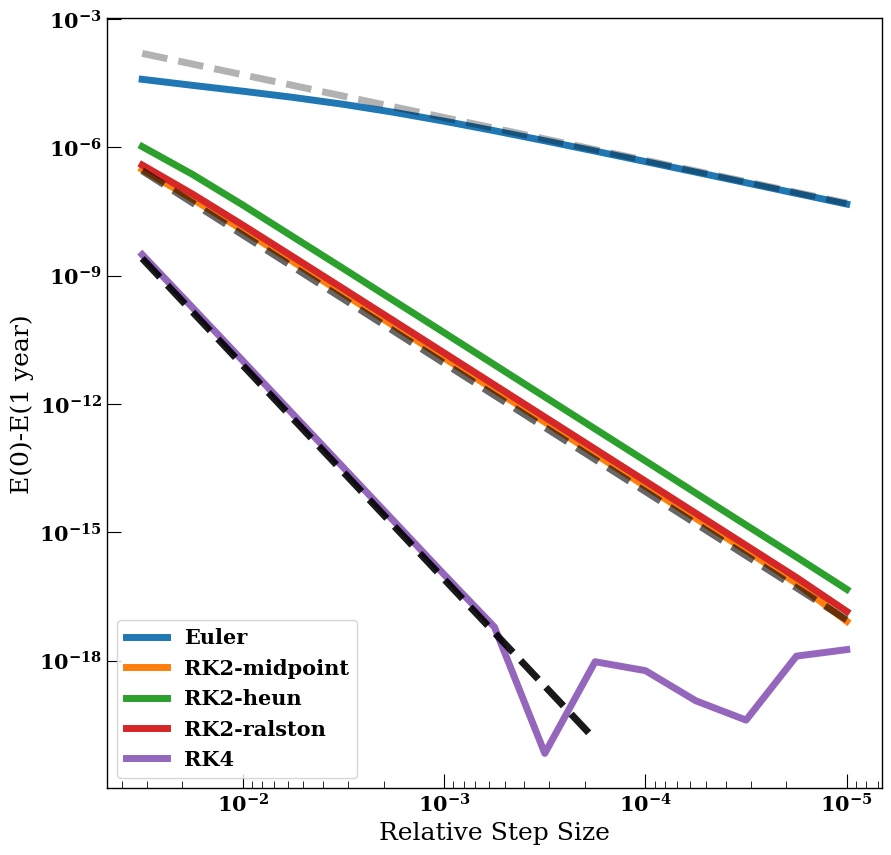

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(dts,E_euler,label='Euler')
plt.plot(dts,E_rk2midpoint,label='RK2-midpoint')
plt.plot(dts,E_rk2heun,label='RK2-heun')
plt.plot(dts,E_rk2ralston,label='RK2-ralston')
plt.plot(dts,E_rk4,label='RK4')
plt.plot(dts,dts*5e-3,c='k',ls='--',alpha=0.3)
plt.plot(dts,(dts**3)*9e-3,c='k',ls='--',alpha=0.6)
plt.plot(dts[:10],(dts[:10]**5)*8e-2,c='k',ls='--',alpha=0.9)
plt.xscale('log')
plt.yscale('log')

plt.gca().invert_xaxis()
plt.xlabel("Relative Step Size")
plt.ylabel("E(0)-E(1 year)")
ax.legend(loc='best')
plt.savefig('ERK_errorstep.png')

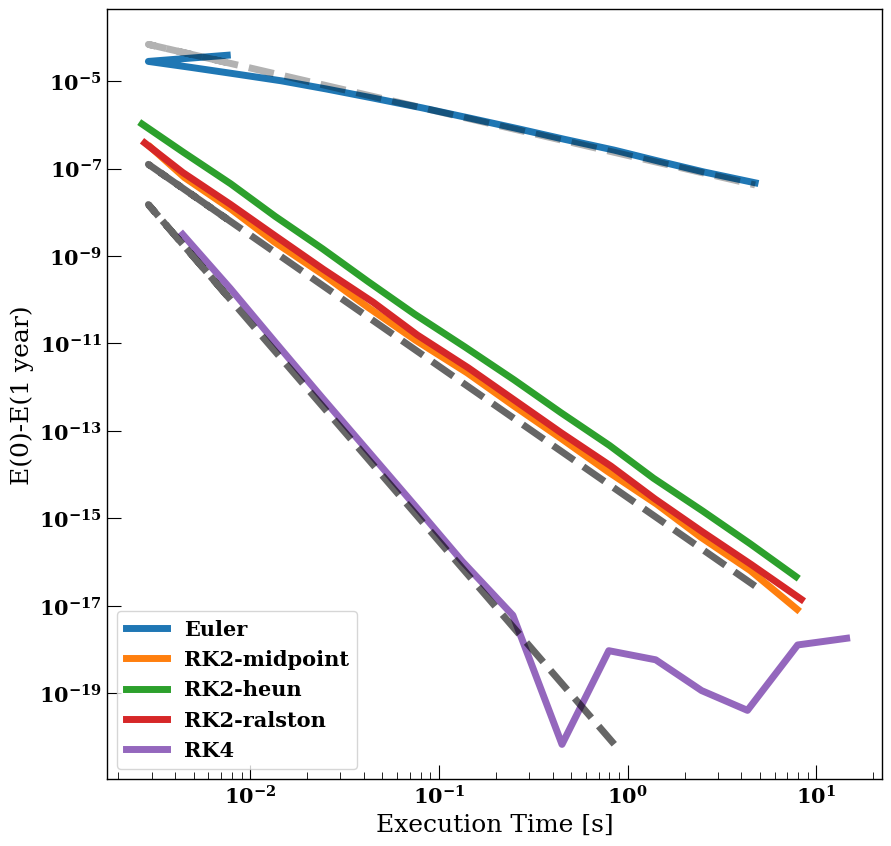

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(T_euler,E_euler,label='Euler')
plt.plot(T_rk2midpoint,E_rk2midpoint,label='RK2-midpoint')
plt.plot(T_rk2heun,E_rk2heun,label='RK2-heun')
plt.plot(T_rk2ralston,E_rk2ralston,label='RK2-ralston')
plt.plot(T_rk4,E_rk4,label='RK4')
plt.plot(T_euler,(np.array(T_euler)**-1)*2e-7,c='k',ls='--',alpha=0.3)
plt.plot(T_euler,(np.array(T_euler)**-3)*3e-15,c='k',ls='--',alpha=0.6)
plt.plot(T_euler[:-3],(np.array(T_euler[:-3])**-5)*3e-21,c='k',ls='--',alpha=0.6)
plt.xscale('log')
plt.yscale('log')

#plt.gca().invert_xaxis()
plt.xlabel("Execution Time [s]")
plt.ylabel("E(0)-E(1 year)")
ax.legend(loc='best')
plt.savefig('ERK_errortime.png')
plt.show()